In [ ]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:
# Open image and display
original = Image.open(requests.get('https://raw.githubusercontent.com/aishuaishu10/aishwarya-pan-card/main/WhatsApp%20Image%202025-04-16%20at%2018.23.23_2c56de91.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://s.yimg.com/uu/api/res/1.2/FpsZe10q6osIDCYGCEB_sQ--~B/aD04MDk7dz0xNDQwO2FwcGlkPXl0YWNoeW9u/http://media.zenfs.com/en-IN/homerun/newsbytes_319/ed349af8c5fd05ff2bac5b5bfdbd2d31', stream = True).raw)

In [ ]:
# The file format of the source file.
print("Original image format : ", original.format)
print("Tampered image format : ", tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ", original.size)
print("Tampered image size : ", tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


In [ ]:
# Resize Image
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png') # Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') # Save image

(250, 160)
(250, 160)


In [ ]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')  # can do png to jpg format

array([[[ 43,  68, 141],
        [ 42,  72, 131],
        [ 56,  82, 127],
        ...,
        [ 57,  91, 158],
        [ 57,  91, 164],
        [ 59,  91, 162]],

       [[ 41,  66, 127],
        [ 73,  85, 126],
        [124, 123, 142],
        ...,
        [ 57,  93, 159],
        [ 59,  93, 162],
        [ 60,  92, 163]],

       [[ 79,  90, 124],
        [145, 136, 149],
        [178, 161, 149],
        ...,
        [ 57,  93, 165],
        [ 61,  94, 164],
        [ 60,  92, 163]],

       ...,

       [[104, 115, 160],
        [163, 161, 178],
        [181, 171, 170],
        ...,
        [ 72, 104, 169],
        [ 72, 105, 170],
        [ 73, 105, 170]],

       [[ 57,  84, 154],
        [100, 113, 159],
        [156, 156, 176],
        ...,
        [ 70, 104, 167],
        [ 70, 105, 169],
        [ 70, 105, 169]],

       [[ 49,  87, 162],
        [ 55,  85, 153],
        [ 88, 103, 152],
        ...,
        [ 70, 103, 167],
        [ 72, 105, 168],
        [ 69, 104, 168]]], dtype=uint8)
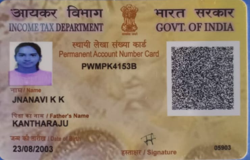

In [ ]:
# Display original image
original

array([[[ 37,  44,  39],
        [ 48,  55,  50],
        [ 63,  70,  65],
        ...,
        [200, 173, 143],
        [199, 171, 141],
        [198, 170, 140]],

       [[ 29,  36,  31],
        [ 38,  45,  40],
        [ 51,  58,  53],
        ...,
        [199, 172, 142],
        [198, 170, 140],
        [197, 169, 139]],

       [[ 30,  37,  32],
        [ 29,  36,  31],
        [ 38,  45,  40],
        ...,
        [198, 170, 140],
        [195, 167, 137],
        [194, 166, 136]],

       ...,

       [[ 12,  16,  17],
        [ 11,  15,  16],
        [  9,  13,  14],
        ...,
        [ 77,  78,  82],
        [ 57,  58,  62],
        [ 42,  43,  47]],

       [[ 12,  16,  17],
        [ 11,  15,  16],
        [  9,  13,  14],
        ...,
        [ 73,  74,  78],
        [ 54,  55,  59],
        [ 42,  43,  47]],

       [[ 12,  16,  17],
        [ 11,  15,  16],
        [  9,  13,  14],
        ...,
        [ 72,  73,  77],
        [ 53,  54,  58],
        [ 42,  43,  47]]], dtype=uint8)
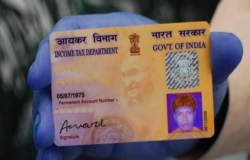

In [ ]:
# Display user given image
tampered

In [ ]:
# Load the two input images

original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [ ]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [ ]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned

(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.17671345308048572


In [ ]:
# Calculating threshold and contours

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# Loop over the contours
for c in cnts:
   # Applying contours on image
   (x, y, w, h) = cv2.boundingRect(c)
   cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
   cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original format image


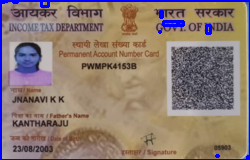

In [ ]:
# Diplay original image with contour
print("Original format image")
Image.fromarray(original)

Tempered image


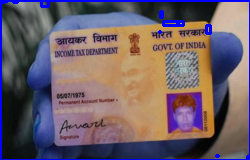

In [ ]:
# Diplay tampered image with contour
print("Tempered image")
Image.fromarray(tampered)

Different Image


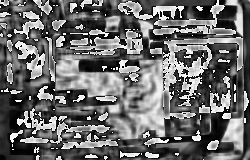

In [ ]:
# Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


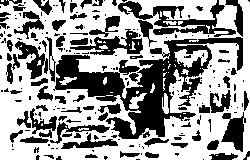

In [ ]:
# Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

As, our SSIM is ~31.6% we can say that the image user provided is fake or tampered.

Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.